In [261]:
#importing modules and packages
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

In [262]:
#importing the dataset to be used
bank_data = pd.read_csv('bank-additional-full.csv', sep=';', index_col=False)
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [263]:
#checking the data types in the dataset
bank_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [264]:
bank_data['education'].replace({'basic.4y' : 'basic 4y', 'basic.6y' : 'basic 6y', 'basic.9y' : 'basic 9y', 'high.school' : 'high school', 'professional.course' : 'professional course', 'university.degree' : 'university degree'}, inplace = True)
bank_data['job'].replace({'admin.' : 'admin'}, inplace = True)
bank_data.head(n=40)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic 6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic 9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin,married,professional course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [265]:
bank_data['education'].unique()

array(['basic 4y', 'high school', 'basic 6y', 'basic 9y',
       'professional course', 'unknown', 'university degree',
       'illiterate'], dtype=object)

In [266]:
#checking for null values
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [267]:
#subsetting columns with floats and integers to detect outliers

bank_data_num = bank_data[['age', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays']]
bank_data_num

,age,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays
0,56,93.994,-36.4,4.857,5191.0,1,999
1,57,93.994,-36.4,4.857,5191.0,1,999
2,37,93.994,-36.4,4.857,5191.0,1,999
3,40,93.994,-36.4,4.857,5191.0,1,999
4,56,93.994,-36.4,4.857,5191.0,1,999
...,...,...,...,...,...,...,...
41183,73,94.767,-50.8,1.028,4963.6,1,999
41184,46,94.767,-50.8,1.028,4963.6,1,999
41185,56,94.767,-50.8,1.028,4963.6,2,999
41186,44,94.767,-50.8,1.028,4963.6,1,999


<Figure size 432x288 with 0 Axes>

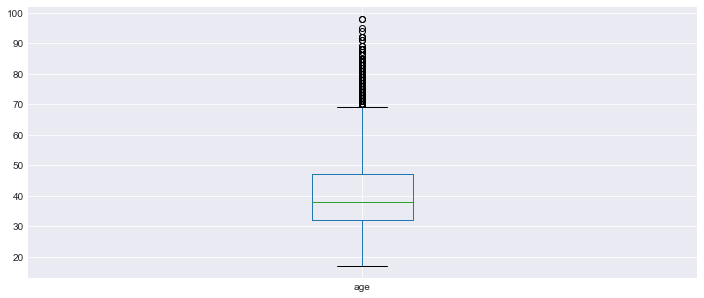

<Figure size 432x288 with 0 Axes>

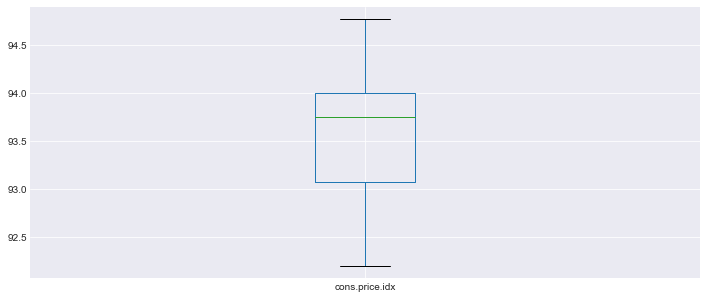

<Figure size 432x288 with 0 Axes>

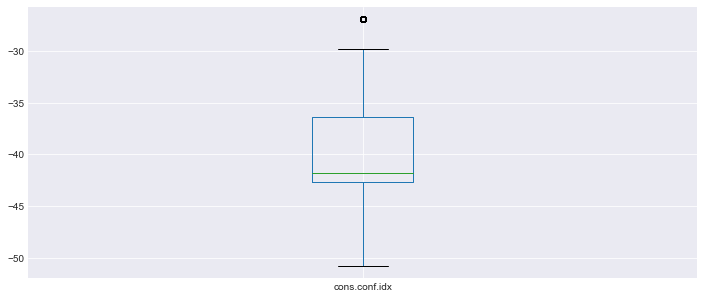

<Figure size 432x288 with 0 Axes>

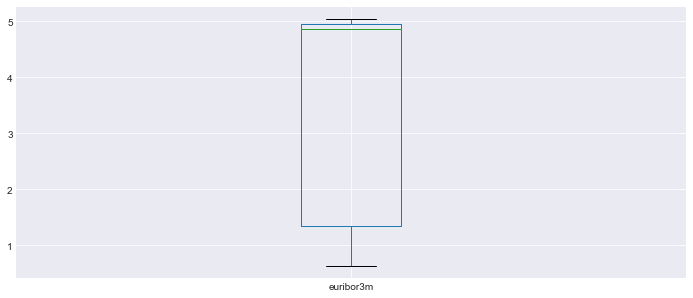

<Figure size 432x288 with 0 Axes>

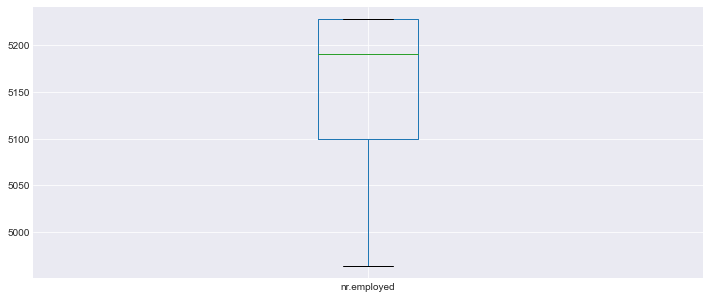

<Figure size 432x288 with 0 Axes>

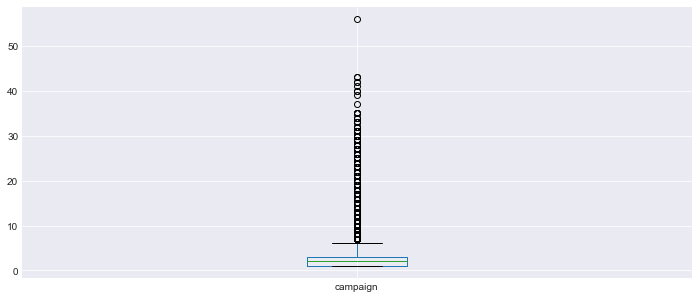

<Figure size 432x288 with 0 Axes>

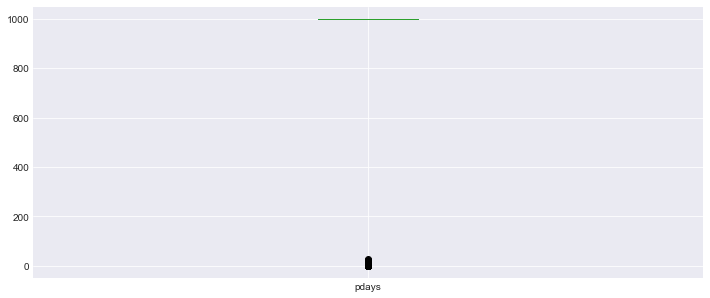

In [268]:
#visualizing the outliers using boxplot
for column in bank_data_num:
    plt.figure()
    plt.subplots(figsize=(12,5))
    plt.style.use('seaborn-darkgrid')
    bank_data_num.boxplot([column])

In [269]:
# There are several outliers in the age and campaign column. This can be handled by transforming them
# Transorming the outliers using log
bank_data['log_age'] = [np.log(x) for x in bank_data['age']]
bank_data['log_campaign'] = [np.log(x) for x in bank_data['campaign']]

In [270]:
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,log_age,log_campaign
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.025352,0.000000
1,57,services,married,high school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.043051,0.000000
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.610918,0.000000
3,40,admin,married,basic 6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.688879,0.000000
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.025352,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,4.290459,0.000000
41184,46,blue-collar,married,professional course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,3.828641,0.000000
41185,56,retired,married,university degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,4.025352,0.693147
41186,44,technician,married,professional course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,3.784190,0.000000


In [271]:
# To handle the missing values, we first turn the 'unknown' observations to NaNs
bank_data = bank_data.replace('unknown', np.nan)
bank_data.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
log_age              0
log_campaign         0
dtype: int64

In [273]:
#using partial deletion of the missing values on the job and marital attributes as those attributes do not show a strong relationship between the known/unknown status and target response.
bank_data = bank_data.dropna(subset=['job', 'marital'])


In [ ]:
bank_data